In [2]:
import pandas as pd

df=pd.read_csv('housing.csv',index_col=0)
df.tail()

,LSTAT,INDUS,NOX,RM,MEDV
501,9.67,11.93,0.573,6.593,22.4
502,9.08,11.93,0.573,6.120,20.6
503,5.64,11.93,0.573,6.976,23.9
504,6.48,11.93,0.573,6.794,22.0
505,7.88,11.93,0.573,6.030,11.9


In [16]:
import statsmodels.formula.api as smf

model=smf.ols('RM~MEDV+LSTAT+INDUS+NOX',df).fit()

In [6]:
b0=model.params[0]
b1=model.params[1]

In [17]:
# first way

prediction1=b0+b1*df['MEDV']
prediction1.tail()

501    6.277579
502    6.181959
503    6.357263
504    6.256330
505    5.719795
Name: MEDV, dtype: float64

In [18]:
# second way

prediction2=model.predict(df)
prediction2.tail()

501    6.363450
502    6.306712
503    6.525434
504    6.428437
505    5.990579
dtype: float64

In [19]:
df['response']=model.predict(df)
df['error']=df['response']-df['RM']
df.tail()

,LSTAT,INDUS,NOX,RM,MEDV,response,error
501,9.67,11.93,0.573,6.593,22.4,6.363450,-0.229550
502,9.08,11.93,0.573,6.120,20.6,6.306712,0.186712
503,5.64,11.93,0.573,6.976,23.9,6.525434,-0.450566
504,6.48,11.93,0.573,6.794,22.0,6.428437,-0.365563
505,7.88,11.93,0.573,6.030,11.9,5.990579,-0.039421


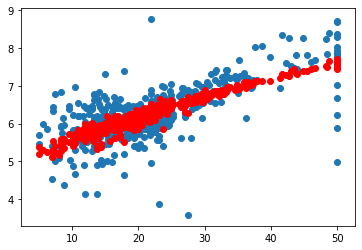

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df['MEDV'],df['RM'])
plt.scatter(df['MEDV'],df['response'],color='r')
plt.show()

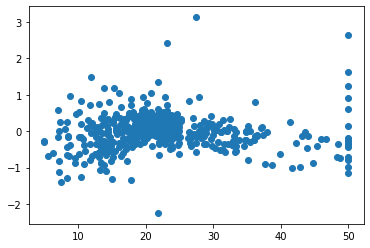

In [22]:
plt.scatter(df['MEDV'],df['error'])

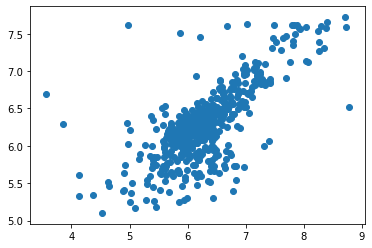

In [23]:
plt.scatter(df['RM'],df['response'])

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           4.04e-77
Time:                        02:00:03   Log-Likelihood:                -356.32
No. Observations:                 506   AIC:                             722.6
Df Residuals:                     501   BIC:                             743.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3272      0.171     31.115      0.000       4.991       5.664
MEDV           0.0398      0.004     11.241      0.000       0.033       0.047
LSTAT         -0.0254      0.005     -4.924      0.000      -0.035      -0.015
INDUS         -0.0097      0.005     -1.868      0.062      -0.020       0.001
NOX            0.8812      0.303      2.906      0.004       0.286       1.477
==============================================================================
Omnibus:                      118.576   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              984.071
Skew:                          -0.762   Prob(JB):                    2.05e-214
Kurtosis:                       9.660   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""